In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from scipy.stats import qmc
from scipy.spatial import Delaunay
import matplotlib.tri as tri

#Aux functions for generate samples
def move_point(max_number, xPoint , yPoint, tolerance):
    r =  np.random.uniform(0, 1)
    n = max_number
    if r > 0.5:
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
        if xPoint <= max_number*tolerance: 
            xPoint = 0
        if yPoint <= max_number*tolerance: 
            yPoint = 0
    else:
        if xPoint <= max_number*tolerance: 
            xPoint = 0            
        if yPoint <= max_number*tolerance: 
            yPoint = 0
        if xPoint >= max_number*(1.0-tolerance): 
            xPoint = n
        if yPoint >= max_number*(1.0-tolerance): 
            yPoint = n
    #print("returning", xPoint, yPoint)
    return (xPoint, yPoint)

def add_box(arr, tolerance):
    box = [[0, 0], [1, 1], [0, 1], [1, 0]]
    arr = np.append(arr, box, axis=0)
    np.unique(arr, axis=0)

    maxNumber = max(max(arr[:,0]), max(arr[:,1]))
    for i in range(0, len(arr)):
        new_p = move_point(1, arr[i,0], arr[i,1], tolerance)
        arr[i,0] = new_p[0]
        arr[i,1] = new_p[1]
    return arr

np.random.seed(42)
rng = 42


# Mesh samples generation

Elegir la cantidad de vértices que deben tener las mallas 

In [12]:
# 10
tolerance = 0.1 # max distance sfrom the boundary
radius = 0.5 #Poisson
numVertices = 10 #Random points
PointsperLine = 3 # Uniform
areaMax = 0.085 #Semiuniform

# 500
tolerance = 0.02 # max distance from the boundary
radius = 0.034 #Poisson
numVertices = 500 #Random points
PointsperLine = 23 # Uniform
areaMax = 0.0017 #Semiuniform


## 1500 vértices
tolerance = 0.02 # max distance from the boundary
radius = 0.02 #Poisson
numVertices = 1500 #Random points
PointsperLine = 39 # Uniform
areaMax = 0.000522 #Semiuniform

# 2500 vértices
tolerance = 0.01 # max distance from the boundary
radius = 0.0154 #Poisson
numVertices = 2500 #Random points
PointsperLine = 50 # Uniform
areaMax = 0.00032 #Semiuniform

# 5000 vértices
numVertices = 5000 #Random points
PointsperLine = 70 # Uniform

# 10000 vértices
numVertices = 10000 #Random points
PointsperLine = 100 # Uniform

# 30000 vértices
numVertices = 30000 #Random points
PointsperLine = 173 # Uniform


# Generación de Poisson triangulation

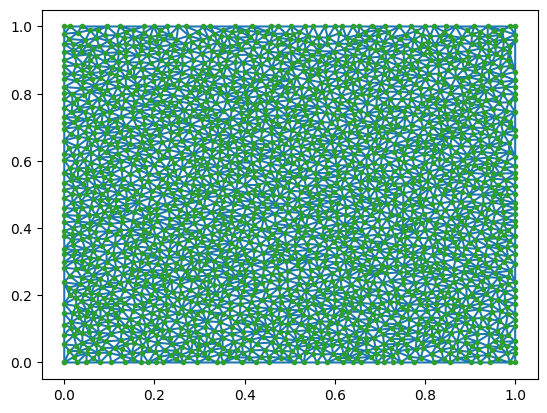

Number of points:  2527


In [13]:

engine = qmc.PoissonDisk(d=2, radius=radius, seed=rng)
sample = engine.fill_space()

sample = add_box(sample, tolerance)
poissonTriangulation = Delaunay(sample)
plt.triplot(sample[:,0], sample[:,1], poissonTriangulation.simplices.copy())
plt.plot(sample[:,0], sample[:,1], '.')
plt.show()
print("Number of points: ", len(sample))

poissonPoints = sample
poissonTriangles = poissonTriangulation.simplices.copy()

Mover puntos cercanos al borde, al borde

# Generación de random triangulation

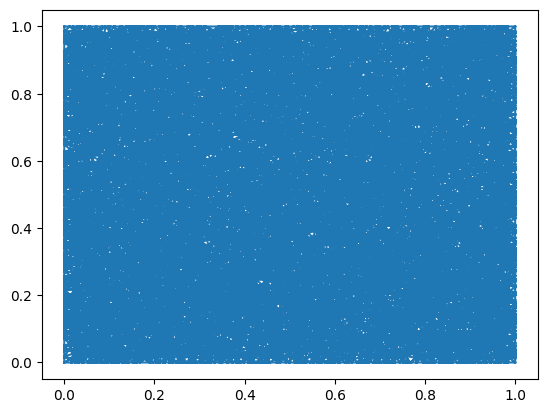

Number of points:  30002


In [14]:


RandomSample = np.random.rand(numVertices - 2,2)
RandomSample = add_box(RandomSample, tolerance)

randomDelaunay = Delaunay(RandomSample)
plt.triplot(RandomSample[:,0], RandomSample[:,1], randomDelaunay.simplices.copy())
plt.show()
print("Number of points: ", len(RandomSample))

randomPoints = RandomSample
randomTriangles = randomDelaunay.simplices.copy()


# Generate uniform grid

Number of points:  29929


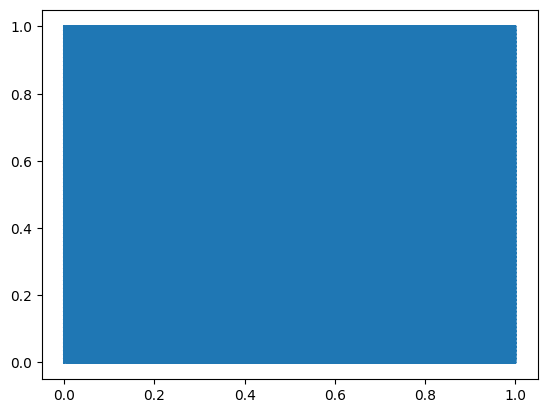

In [15]:
import meshzoo

UniformPoints, UniformTriangles = meshzoo.rectangle_tri(
    np.linspace(0.0, 1.0, PointsperLine),
    np.linspace(0.0, 1.0, PointsperLine),
    variant="zigzag",  # or "up", "down", "center"
)

plt.triplot(UniformPoints[:,0], UniformPoints[:,1], UniformTriangles)

print("Number of points: ", len(UniformPoints))


# semiuniform mesh

Number of points:  2512


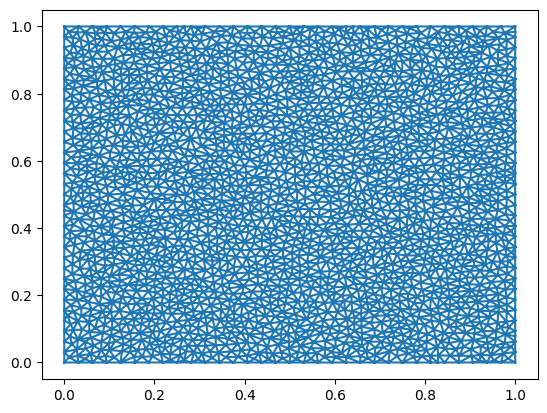

In [16]:
import triangle

t = triangle.triangulate({'vertices': [[0,1],[1,1],[1,0],[0,0]], 'segments': [[0,1],[1,2],[2,3],[3,0]]}, 'qa' + str(areaMax))
ver = t['vertices'].tolist()
simplex = t['triangles'].tolist()

ver = np.array(ver)

plt.triplot(ver[:,0], ver[:,1], simplex)

print("Number of points: ", len(ver))

semiUniformPoints = ver
semiUniformTriangles = simplex

# Generacion del .off

In [17]:
#Num of vertices and simplices
print(len(sample), len(poissonTriangulation.simplices))
print(len(ver), len(simplex))
print(len(UniformPoints), len(UniformTriangles))
print(len(RandomSample), len(randomDelaunay.simplices))

import meshio
#writte .OFF files
meshio.write_points_cells(str(numVertices) + "poisson.off", poissonPoints, [("triangle", poissonTriangles)])
meshio.write_points_cells(str(numVertices) + "random.off", randomPoints, [("triangle", randomTriangles)])
meshio.write_points_cells(str(numVertices) + "uniform.off", UniformPoints, [("triangle", UniformTriangles)])
meshio.write_points_cells(str(numVertices) + "semiUniform.off", semiUniformPoints, [("triangle", semiUniformTriangles)])



2527 4907
2512 4888
29929 59168
30002 58843


Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

Warning: OFF requires 3D points, but 2D points given. Appending 0 as third component.

# Call polylla

In [18]:
import os

os.system(".\Polylla.exe " + str(numVertices) + "poisson.off " + str(numVertices) + "poisson.polylla")
os.system(".\Polylla.exe " + str(numVertices) + "random.off " + str(numVertices) + "random.polylla")
os.system(".\Polylla.exe " + str(numVertices) + "uniform.off " + str(numVertices) + "uniform.polylla")
os.system(".\Polylla.exe " + str(numVertices) + "semiUniform.off " + str(numVertices) + "semiUniform.polylla")

print(".\Polylla.exe " + str(numVertices) + "random.off " + str(numVertices) + "random.polylla")


.\Polylla.exe 30000random.off 30000random.polylla


# Create .mat

In [19]:
from createmat import createmat

createmat(str(numVertices) + "poisson.polylla")
createmat(str(numVertices) + "random.polylla")
createmat(str(numVertices) + "uniform.polylla")
createmat(str(numVertices) + "semiUniform.polylla")

Reading file: 30000poisson.polylla.ale
Writing file: 30000poisson.polylla.mat
Reading file: 30000random.polylla.ale
Writing file: 30000random.polylla.mat
Reading file: 30000uniform.polylla.ale
Writing file: 30000uniform.polylla.mat
Reading file: 30000semiUniform.polylla.ale
Writing file: 30000semiUniform.polylla.mat
